In [1]:
rm(list=ls());
graphics.off()

# Some preliminary exercices using R

In [ ]:
install.packages("swirl")
library(swirl)
swirl::play()

In [ ]:
fact <- function(n) {
    if (n == 0) {
        return(1)
    } else {
        return(n * fact(n - 1))
    }
}

exponential_sum <- function(x, k) {
    return (x^k / fact(k))
}

exp2 <- sapply(1:20, function(i) exponential_sum(1, i))
exp2

comparison <- exp(2)
comparison
for (i in 1:20) {
    if (abs(exp2[i]) > 1e-8) {
        comparison <- comparison - exp2[i]
    }
}
comparison

In [ ]:
# Simulation of X ~ N(2, 1) and Y = 9.8*X + eps with eps ~ N(0, 0.1^2)
n <- 100
X <- rnorm(n, mean = 2, sd = 1)
Y <- 9.8 * X + rnorm(n, mean = 0, sd = 0.1)

# Quick diagnostics
cat("Mean(X):", mean(X), "\n")
cat("Var(X):", var(X), " (should be close to 1)\n")
cat("First 6 values of X:", head(X), "\n")
cat("First 6 values of Y:", head(Y), "\n")

# Optional visualization
plot(X, Y, main = "Simulated data: Y vs X", xlab = "X", ylab = "Y")
abline(lm(Y ~ X), col = "red", lwd = 2)

# Store in a data.frame if needed later
data_sim <- data.frame(X = X, Y = Y)
head(data_sim)

# Ordinary Least Square (OLS) / Moindres Carrés Ordinaires (MCO)

In [2]:
tab = read.table("immo.txt", sep = ";", header = TRUE)
tab

surface,valeur,prix
<dbl>,<dbl>,<int>
153.1,573,748
152.0,638,740
162.5,654,729
143.3,570,700
145.7,638,749
173.3,632,760
144.8,602,720
149.1,577,735
152.5,564,745


In [3]:
head(tab)
names(tab)
tab[,1]
tab$surface
tab[,c(1,3)]
tab$prix

,surface,valeur,prix
,<dbl>,<dbl>,<int>
1,153.1,573,748
2,152.0,638,740
3,162.5,654,729
4,143.3,570,700
5,145.7,638,749
6,173.3,632,760


[1] "surface" "valeur"  "prix"

[1] 153.1 152.0 162.5 143.3 145.7 173.3 144.8 149.1 152.5 138.9 151.8 144.4
[13] 148.7 186.3 152.0 257.6 190.5 153.7 180.6 163.5

[1] 153.1 152.0 162.5 143.3 145.7 173.3 144.8 149.1 152.5 138.9 151.8 144.4
[13] 148.7 186.3 152.0 257.6 190.5 153.7 180.6 163.5

surface,prix
<dbl>,<int>
153.1,748
152.0,740
162.5,729
143.3,700
145.7,749
173.3,760
144.8,720
149.1,735
152.5,745


[1]  748  740  729  700  749  760  720  735  745  735  715  710  789  865  680
[16] 1020  840  690  880  760

In [4]:
nrow(tab)
dim(tab)

[1] 20

[1] 20  3

Number of observations : 20
Number of variables : 3

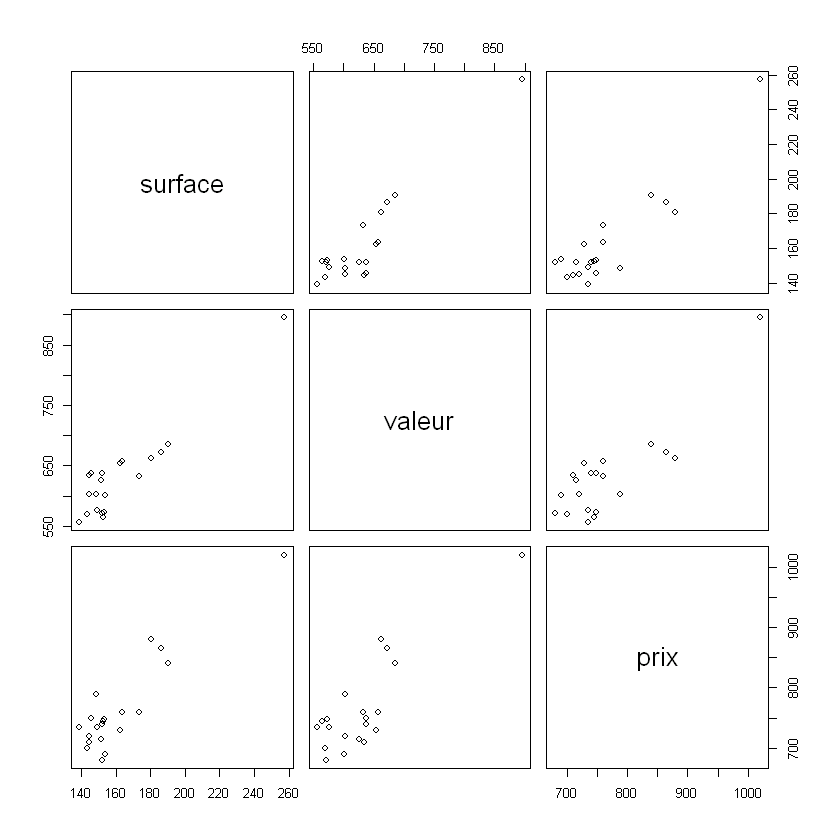

In [5]:
plot(tab)

In [6]:
cor(tab)

,surface,valeur,prix
surface,1.0000000,0.9257106,0.9133195
valeur,0.9257106,1.0000000,0.8513841
prix,0.9133195,0.8513841,1.0000000


Les coefficients de la méthode OLS sont $\hat{\beta}=(X^TX)^{-1}X^TY$

In [7]:
modreg=lm(prix~.,data=tab)
print(modreg)
summary(modreg)
attributes(modreg)
coef(modreg)
modreg$res


Call:
lm(formula = prix ~ ., data = tab)

Coefficients:
(Intercept)      surface       valeur  
  309.66566      2.63440      0.04518  




Call:
lm(formula = prix ~ ., data = tab)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.894 -15.411  -0.718  13.507  64.605 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 309.66566   78.82208   3.929  0.00108 **
surface       2.63440    0.78560   3.353  0.00377 **
valeur        0.04518    0.28518   0.158  0.87598   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 34.73 on 17 degrees of freedom
Multiple R-squared:  0.8344,	Adjusted R-squared:  0.8149 
F-statistic: 42.83 on 2 and 17 DF,  p-value: 2.302e-07


$names
 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        

$class
[1] "lm"

(Intercept)      surface       valeur 
309.66566335   2.63439962   0.04518386

1          2          3          4          5          6          7 
  9.117402   1.078291 -38.305847 -12.929930  26.675008 -34.763318   1.672587 
         8          9         10         11         12         13         14 
  6.474265   8.104697  34.294002 -22.852623  -8.719537  60.398429  34.182132 
        15         16         17         18         19         20 
-55.894391  -8.771746  -2.514920 -51.728386  64.604865 -10.120982

On cherche l'expression de $\mathrm{prix}=f_\theta(\mathrm{surf},\mathrm{val})$. Ici $f_\theta$ linéarisée, $\mathrm{prix}=\theta_0+\theta_1\mathrm{surf}+\theta_2\mathrm{val}+\varepsilon$
On en déduit que $\hat{f}_\theta = 309+2,63\mathrm{surf}+0,04\mathrm{val}$

$X$ est la matrice qui contient les colonnes $1$, $\mathrm{surf}$ et $\mathrm{val}$ (20 sur 3) et $Y$ est la matrice colonne prix (20 sur 1).

$\hat{\theta}=\theta_{\mathrm{opt}}=\vert\vert\mathrm{prix}-f_\theta(\mathrm{surf},\mathrm{val})\vert\vert^2$. Matriciellement : $\theta_{\mathrm{opt}}=(X^TX)^{-1}X^TY$ que l'on obtient avec la fonction lm.

In [ ]:
help(lm)

Ensuite, on peut afficher $\hat{Y}=\hat{f}_\theta(X)$ en fonction de $Y$

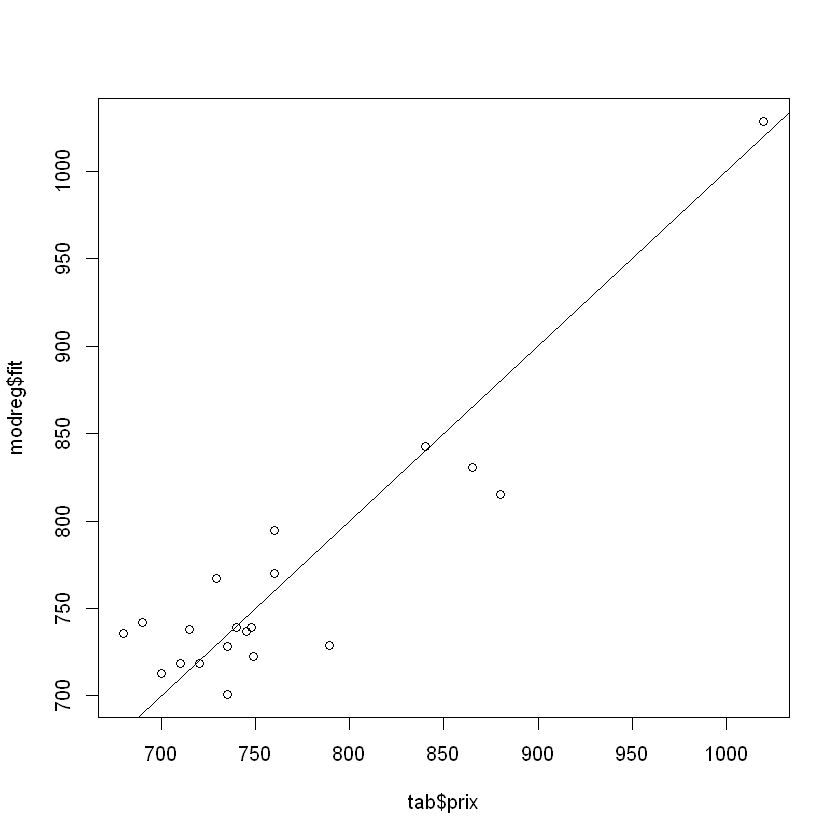

In [8]:
plot(tab$prix, modreg$fit)
abline(0, 1)

In [ ]:
plot(modreg$fit-tab$prix)
plot(tab$prix, modreg$fit-tab$prix)

On obtient une gaussienne : le nombre de points autour de la moyenne...

In [ ]:
summary(modreg)$r.squared

**Deux méthodes pour trouver $\theta_{\mathrm{opt}}=\vert\vert\mathrm{prix}-f_\theta(\mathrm{surf},\mathrm{vol})\vert\vert^2$ : optimisation ou bien probabiliste grâce à un estimateur en posant hypothèse gaussienne sur les résidus.**

In [ ]:
X <- cbind(matrix(1,20,1),matrix(tab$surface),matrix(tab$valeur))
X_T <- t(X)

result<-X_T%*%X
result

result_inv <- solve(result)
result_inv

Y <- matrix(tab$prix,20,1)

theta <- result_inv%*%X_T%*%Y
theta

# The linear model. Study of ice cream consumptions.

In [9]:
tab = read.table("Icecreamdata.txt", sep = ";", header = TRUE)
tab

cons,income,price,temp
<dbl>,<int>,<dbl>,<int>
0.386,78,0.270,41
0.374,79,0.282,56
0.393,81,0.277,63
0.425,80,0.280,68
0.406,76,0.272,69
0.344,78,0.262,65
0.327,82,0.275,61
0.288,79,0.267,47
0.269,76,0.265,32


In [ ]:
modreg=lm(cons~.,data=tab)
print(modreg)
summary(modreg)
attributes(modreg)
coef(modreg)
modreg$res

Valeur des coefficients : 
* income : 0.003308 in US dollars
* price : -1.044414 in US dollars (per pint)
* temp : 0.003458 (in Fahrenheit)

Hypothèse statistique : résidus $\sim \mathcal{N}(0,\sigma^2)$ (gaussienne)

Le test statistique s'appelle le test de Student

Ces codes indiquent le niveau de significativité statistique des coefficients (ou autres valeurs p) :

| Code  | p-value (niveau de signification) | Interprétation                     |
| ----- | --------------------------------- | ---------------------------------- |
| `***` | 0 ≤ p < 0.001                     | Très fortement significatif        |
| `**`  | 0.001 ≤ p < 0.01                  | Fortement significatif             |
| `*`   | 0.01 ≤ p < 0.05                   | Significatif                       |
| `.`   | 0.05 ≤ p < 0.1                    | Faiblement significatif (tendance) |
| ` `   | 0.1 ≤ p ≤ 1                       | Non significatif                   |


Limite de cette approche : seuil arbitraire.

In [ ]:
X <- cbind(matrix(1,30,1),matrix(tab$income),matrix(tab$price),matrix(tab$temp))
X_T <- t(X)

result<-X_T%*%X
result

result_inv <- solve(result)
result_inv

Y <- matrix(tab$cons,30,1)

theta <- result_inv%*%X_T%*%Y
theta

# Application: study your own data using a linear model with transformed data

In [11]:
tab <- read.table("Donnees_amazon.txt", header = TRUE, sep = ";")
tab

Date,Adj_Close
<int>,<dbl>
2005,2.16
2006,2.24
2007,1.88
2008,3.88
2009,2.94
2010,6.27
2011,8.48
2012,9.72
2013,13.27


In [12]:
modreg <- lm(Adj_Close ~ Date, data = tab)
summary(modreg)


Call:
lm(formula = Adj_Close ~ Date, data = tab)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.452 -25.322  -6.718  22.059  81.546 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -19679.030   2394.846  -8.217 1.12e-07 ***
Date             9.795      1.189   8.242 1.07e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 32.98 on 19 degrees of freedom
Multiple R-squared:  0.7814,	Adjusted R-squared:  0.7699 
F-statistic: 67.92 on 1 and 19 DF,  p-value: 1.074e-07


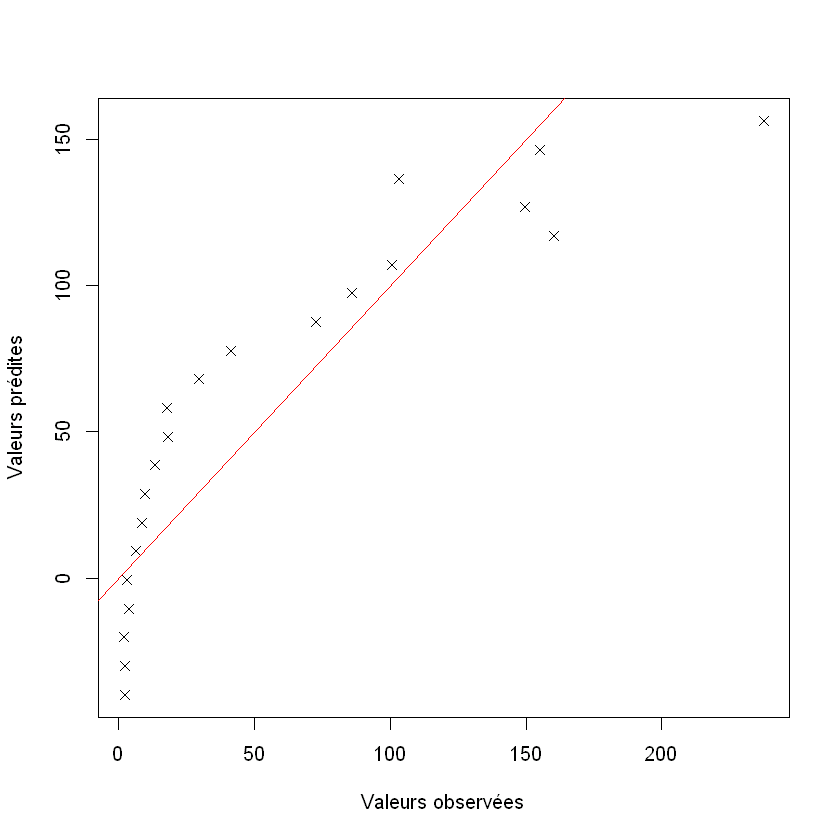

In [13]:
plot(tab$Adj_Close, fitted(modreg), xlab = "Valeurs observées", ylab = "Valeurs prédites", pch = 4)
abline(0, 1, col = "red")

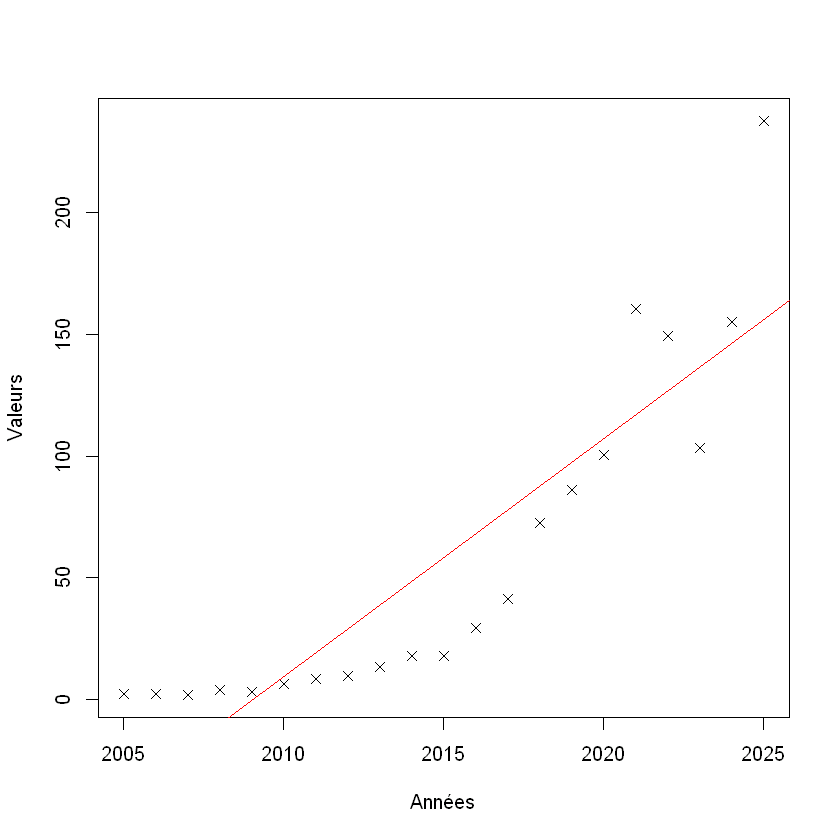

In [14]:
plot(tab$Date, tab$Adj_Close, xlab = "Années", ylab = "Valeurs", pch = 4)
abline(modreg, col = "red")

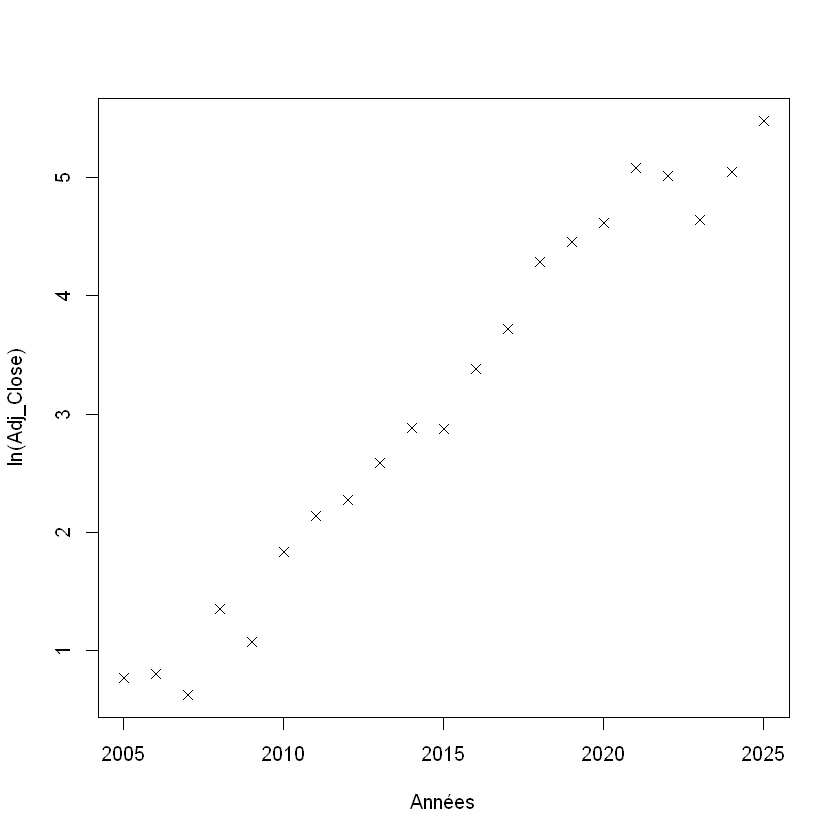

In [15]:
tab$Log_Adj_Close <- log(tab$Adj_Close)
plot(tab$Date, tab$Log_Adj_Close, xlab = "Années", ylab = "ln(Adj_Close)", pch = 4)
abline(0, 1, col = "red")

In [16]:
logmodreg <- lm(Log_Adj_Close ~ Date, data = tab)
summary(logmodreg)


Call:
lm(formula = Log_Adj_Close ~ Date, data = tab)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.51939 -0.20047  0.03721  0.11039  0.43774 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -516.79315   20.43333  -25.29 4.30e-16 ***
Date           0.25801    0.01014   25.44 3.85e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2814 on 19 degrees of freedom
Multiple R-squared:  0.9715,	Adjusted R-squared:   0.97 
F-statistic: 647.4 on 1 and 19 DF,  p-value: 3.85e-16


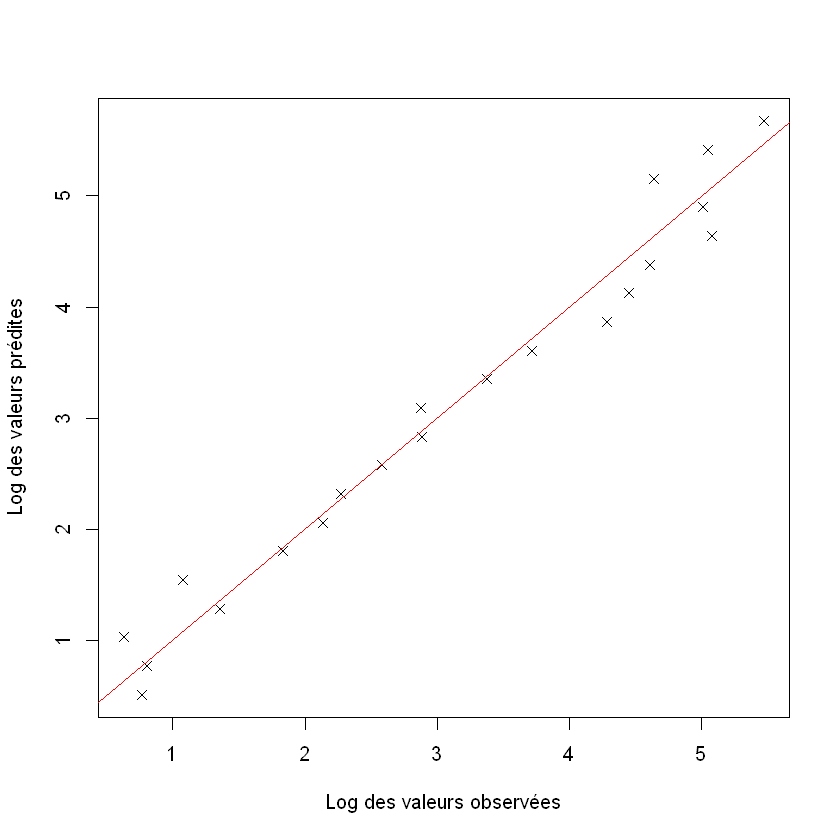

In [17]:
plot(tab$Log_Adj_Close, fitted(logmodreg), xlab = "Log des valeurs observées", ylab = "Log des valeurs prédites", pch = 4)
abline(0, 1, col = "red")

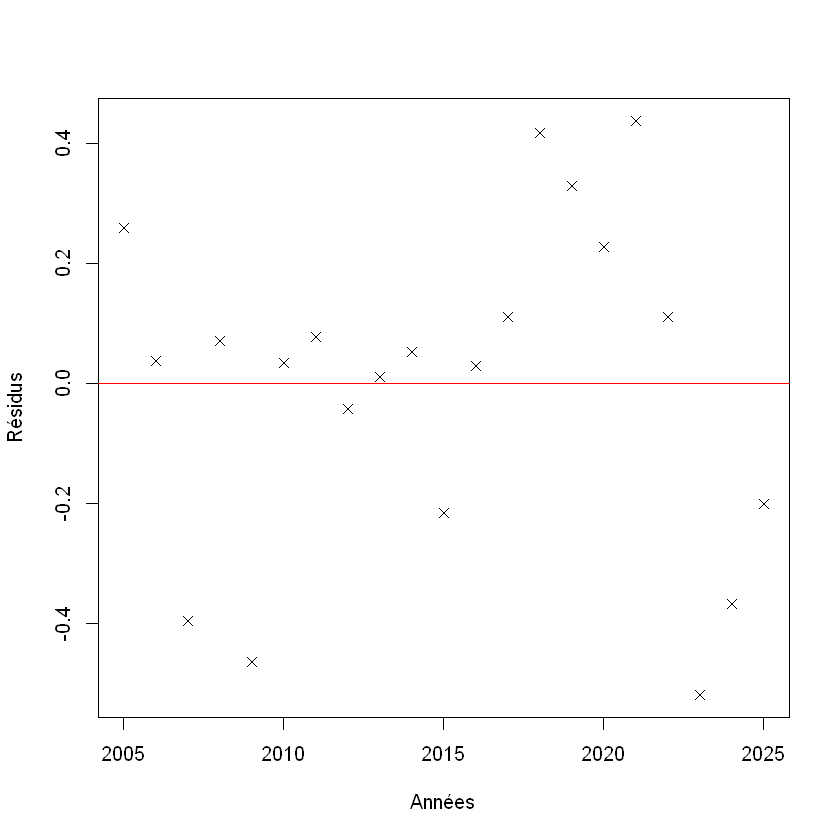

In [18]:
plot(tab$Date, residuals(logmodreg), xlab = "Années", ylab = "Résidus", pch = 4)
abline(h = 0, col = "red")

# Electricity Data Set

The goal is to explain Mexico daily total electricity generation using variables in `Mexico_data.csv`.

In [21]:
data <- read.csv("Mexico_data.csv")
summary(data)

      X0                  RH             SSRD              STRD        
 Length:1461        Min.   :28.37   Min.   : 407045   Min.   :1019376  
 Class :character   1st Qu.:50.12   1st Qu.: 719323   1st Qu.:1156350  
 Mode  :character   Median :57.66   Median : 870071   Median :1235306  
                    Mean   :57.55   Mean   : 869055   Mean   :1244835  
                    3rd Qu.:64.55   3rd Qu.:1022083   3rd Qu.:1353442  
                    Max.   :80.54   Max.   :1217895   Max.   :1431876  
      T2M            T2Mmax          T2Mmin           Covid      
 Min.   :11.23   Min.   :17.82   Min.   : 5.536   Min.   : 0.00  
 1st Qu.:18.09   1st Qu.:25.27   1st Qu.:12.064   1st Qu.: 0.00  
 Median :22.32   Median :28.72   Median :16.220   Median :33.33  
 Mean   :21.27   Mean   :27.93   Mean   :15.623   Mean   :33.00  
 3rd Qu.:24.63   3rd Qu.:30.83   3rd Qu.:19.747   3rd Qu.:63.89  
 Max.   :27.39   Max.   :33.83   Max.   :21.841   Max.   :82.41  
    Holidays            DOW       

### Variable descriptions

- X0: day of the year
- RH: Relative humidity (%)
- SSRD: Surface solar radiation downward (J.m-2)
- STRD: Surface thermal radiation downward (J.m-2)
- T2M: average daily temperature at 2m (°C)
- T2Mmax: maximum daily temperature at 2m (°C)
- T2Mmin: minimum daily temperature at 2m (°C)
- Covid: COVID-19 stringency index
- Holidays: holidays or public holidays, 1 = holidays, 0 otherwise
- DOW: Day of Week, 0 for Monday, 1 for Tuesday, ...
- TOY: Day of the year (from 1 to 366)
- Total: Electricity generated daily in the territory (GWh)

Let us build a linear model with multiple predictors $\mathrm{Total} = \theta_0 + \theta_1 \mathrm{RH} + \theta_2 \mathrm{SSRD} + \theta_3 \mathrm{STRD} + \theta_4 \mathrm{T2M} + \theta_5 \mathrm{T2Mmax} + \theta_6 \mathrm{T2Mmin} + \theta_7 \mathrm{Covid} + \theta_8 \mathrm{Holidays} + \theta_9 \mathrm{DOW} + \theta_{10} \mathrm{TOY} + \varepsilon$

In [ ]:
# Identify target y column
target_col <- "Total"

# Identify x column (date)
first_col <- names(data)[1]

# Exclude target and first column from predictors
predictors <- setdiff(names(data), c(target_col, first_col))

# Build formula
form <- as.formula(paste(target_col, "~", paste(predictors, collapse = " + ")))

In [57]:
# Fit linear model
model <- lm(form, data = data, na.action = na.omit)
summary(model)

# Extract model values
obs <- model$y
fit <- fitted(model)
res <- residuals(model)


Call:
lm(formula = form, data = data, na.action = na.omit)

Residuals:
    Min      1Q  Median      3Q     Max 
-170.43  -33.41    4.57   35.44  191.36 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.289e+02  9.101e+01   3.614 0.000312 ***
RH          -7.449e-01  4.701e-01  -1.585 0.113241    
SSRD         1.738e-04  2.251e-05   7.722 2.12e-14 ***
STRD         4.174e-04  9.395e-05   4.442 9.58e-06 ***
T2M          2.277e-01  8.496e+00   0.027 0.978622    
T2Mmax      -4.920e+00  4.348e+00  -1.131 0.258037    
T2Mmin       6.313e+00  5.842e+00   1.081 0.280094    
Covid       -2.867e-01  4.964e-02  -5.776 9.35e-09 ***
Holidays    -8.732e+01  8.057e+00 -10.838  < 2e-16 ***
DOW         -1.305e+01  6.835e-01 -19.090  < 2e-16 ***
TOY          5.072e-02  1.716e-02   2.955 0.003172 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 51.95 on 1450 degrees of freedom
Multiple R-squared:  0.7035,	Adjusted R-squar

In [ ]:
# "Convert" date to an index otherwise R will not plot it correctly and output an error
x_index <- seq_len(nrow(data))

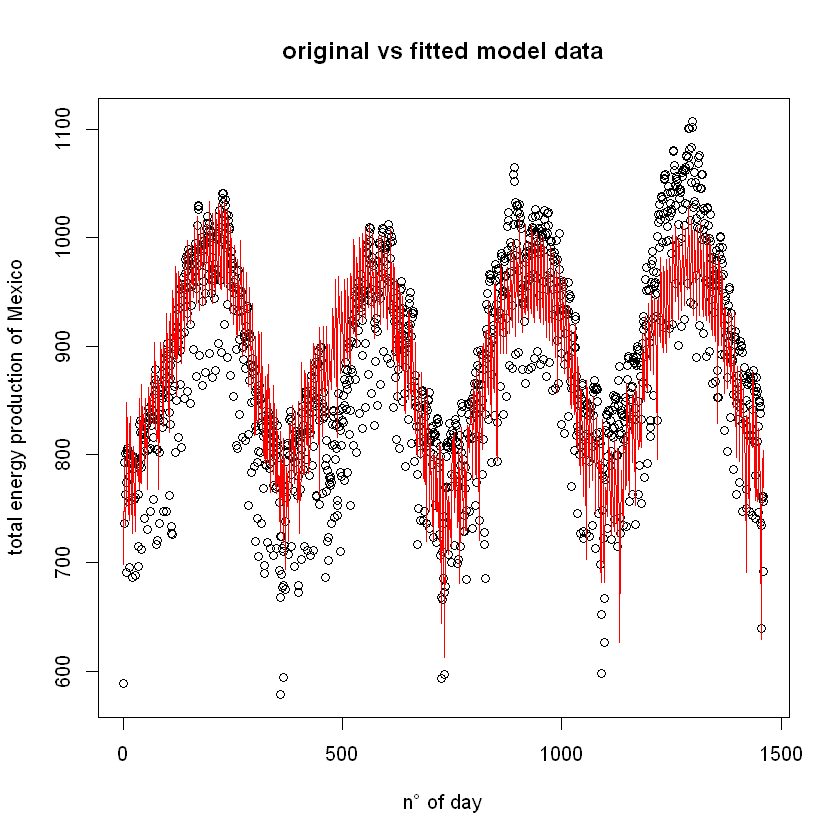

In [72]:
# Original vs Fitted
plot(x_index, data[[target_col]], xlab = "n° of day", ylab = "total energy production of Mexico", main = "original vs fitted model data")
lines(x_index, fit, col = "red")

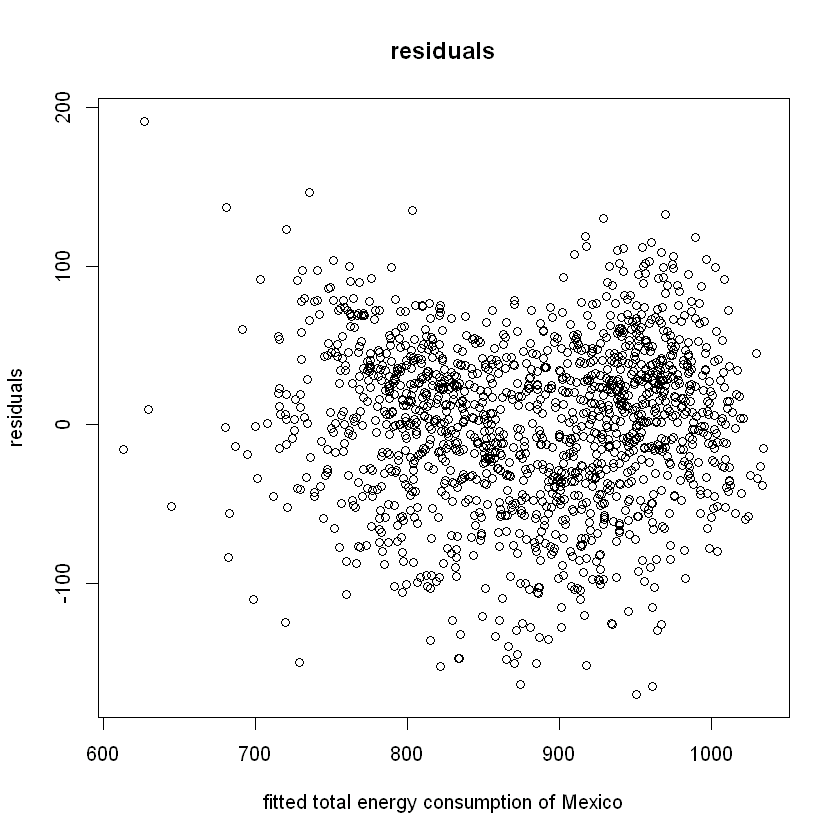

In [71]:
# Residuals vs Fitted
plot(fit, res, xlab = "fitted total energy consumption of Mexico", ylab = "residuals", main = "residuals")